/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


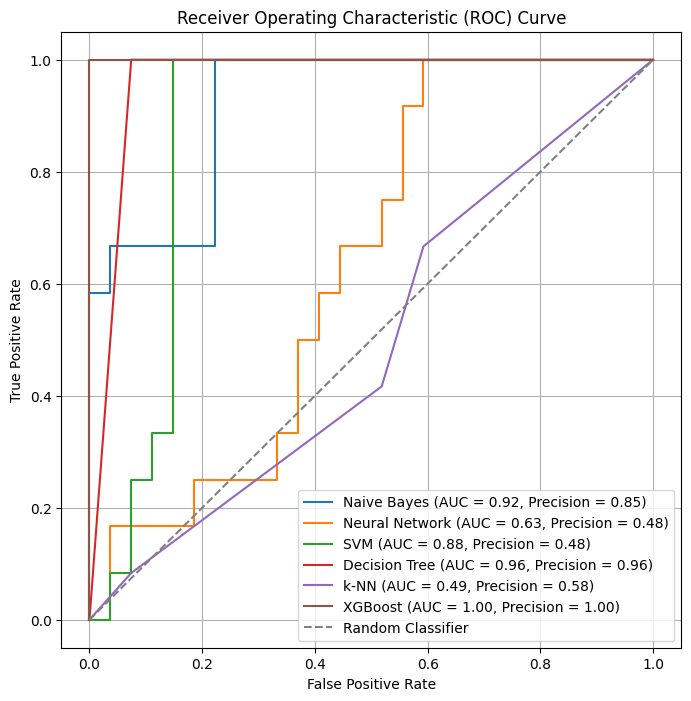

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Load the dataset using pandas
file_path = "/content/Diabetes Classification.csv"
diabetes = pd.read_csv(file_path)

numeric_columns = diabetes.select_dtypes(include=['int', 'float']).columns
diabetes_numeric = diabetes[numeric_columns]

label_encoder = LabelEncoder()
for col in diabetes.columns:
    if diabetes[col].dtype == 'object':
        diabetes[col] = label_encoder.fit_transform(diabetes[col])

target_column_name = 'Diagnosis'

# Separating features and target
X = diabetes.drop(columns=[target_column_name])
y = diabetes[target_column_name]

# Split the training set into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Example Naive Bayes predicted probabilities
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
predicted_probabilities_nb = naive_bayes_model.predict_proba(X_test)[:, 1]

# Example Neural Network predicted probabilities
neural_network_model = MLPClassifier()
neural_network_model.fit(X_train, y_train)
predicted_probabilities_nn = neural_network_model.predict_proba(X_test)[:, 1]

# Example SVM predicted probabilities
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
predicted_probabilities_svm = svm_model.predict_proba(X_test)[:, 1]

# Example Decision Tree predicted probabilities
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
predicted_probabilities_dt = decision_tree_model.predict_proba(X_test)[:, 1]

# Additional classifiers
knn_classifier = KNeighborsClassifier(n_neighbors=5)
xgb_classifier = XGBClassifier()

# Fit k-NN and XGBoost models on the training data
knn_classifier.fit(X_train, y_train)
xgb_classifier.fit(X_train, y_train)

# Obtain predicted probabilities for k-NN and XGBoost
predicted_probabilities_knn = knn_classifier.predict_proba(X_test)[:, 1]
predicted_probabilities_xgb = xgb_classifier.predict_proba(X_test)[:, 1]

true_labels = y_test  # Assuming y_test contains the true labels

# Calculate ROC curve and AUC for each classifier
fpr_nb, tpr_nb, _ = roc_curve(true_labels, predicted_probabilities_nb)
fpr_nn, tpr_nn, _ = roc_curve(true_labels, predicted_probabilities_nn)
fpr_svm, tpr_svm, _ = roc_curve(true_labels, predicted_probabilities_svm)
fpr_dt, tpr_dt, _ = roc_curve(true_labels, predicted_probabilities_dt)
fpr_knn, tpr_knn, _ = roc_curve(true_labels, predicted_probabilities_knn)
fpr_xgb, tpr_xgb, _ = roc_curve(true_labels, predicted_probabilities_xgb)

roc_auc_nb = auc(fpr_nb, tpr_nb)
roc_auc_nn = auc(fpr_nn, tpr_nn)
roc_auc_svm = auc(fpr_svm, tpr_svm)
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_knn = auc(fpr_knn, tpr_knn)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Precision scores for each classifier
precision_nb = precision_score(y_test, naive_bayes_model.predict(X_test), average='weighted')
precision_nn = precision_score(y_test, neural_network_model.predict(X_test), average='weighted')
precision_svm = precision_score(y_test, svm_model.predict(X_test), average='weighted')
precision_dt = precision_score(y_test, decision_tree_model.predict(X_test), average='weighted')
precision_knn = precision_score(y_test, knn_classifier.predict(X_test), average='weighted')
precision_xgb = precision_score(y_test, xgb_classifier.predict(X_test), average='weighted')

# Plot ROC curves
plt.figure(figsize=(8, 8))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f}, Precision = {precision_nb:.2f})')
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {roc_auc_nn:.2f}, Precision = {precision_nn:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f}, Precision = {precision_svm:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f}, Precision = {precision_dt:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'k-NN (AUC = {roc_auc_knn:.2f}, Precision = {precision_knn:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f}, Precision = {precision_xgb:.2f})')

# Plot the random classifier
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

# Set plot details
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()
